In [1]:
#importing the required libraries
import sklearn
import numpy as np #working with arrays. 
import pandas as pd #data manipulation library that is necessary for every aspect of data analysis or machine learning.

In [2]:
#Loading the dataset
dataset = pd.read_csv(r"C:\Users\syoni\Downloads\3.2\ARTIFICIAL INTELLIGENCE\GROUP WORK DATASET - KNN\fake_job_postings.csv")

In [3]:
#Exploratory Data Analysis
dataset.shape #returns the orientation of the dataset i.e number of columns and rows.

(17880, 18)

In [4]:
dataset.head(5) #returns part of the dataset with agiven number of colums

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
dataset.describe() #returns some statistical information for the data

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Number of rows belonging to each class
dataset.groupby('fraudulent').size()

fraudulent
0    17014
1      866
dtype: int64

The dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. 
The actual features are described by columns 1-4. Last column contains labels of samples.
There is need to split data into two arrays: X (features) and y (labels).

In [7]:
feature_columns = ['telecommuting', 'has_company_logo', 'has_questions']
X = dataset[feature_columns].values
y = dataset['fraudulent'].values
# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

The labels here are categorical. The KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
# # separating each row
# N=dataset.iloc[:,:].values

In [10]:
# N[:,2]=le.fit_transform(N[:,2])
# N[:,3]=le.fit_transform(N[:,3])

In [11]:
# Z=pd.DataFrame(N)
# feature_columns = [2,3]
# X = Z[feature_columns].values
# y = Z[17].values

In [12]:
# Z

In [13]:
#Spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 640x480 with 0 Axes>

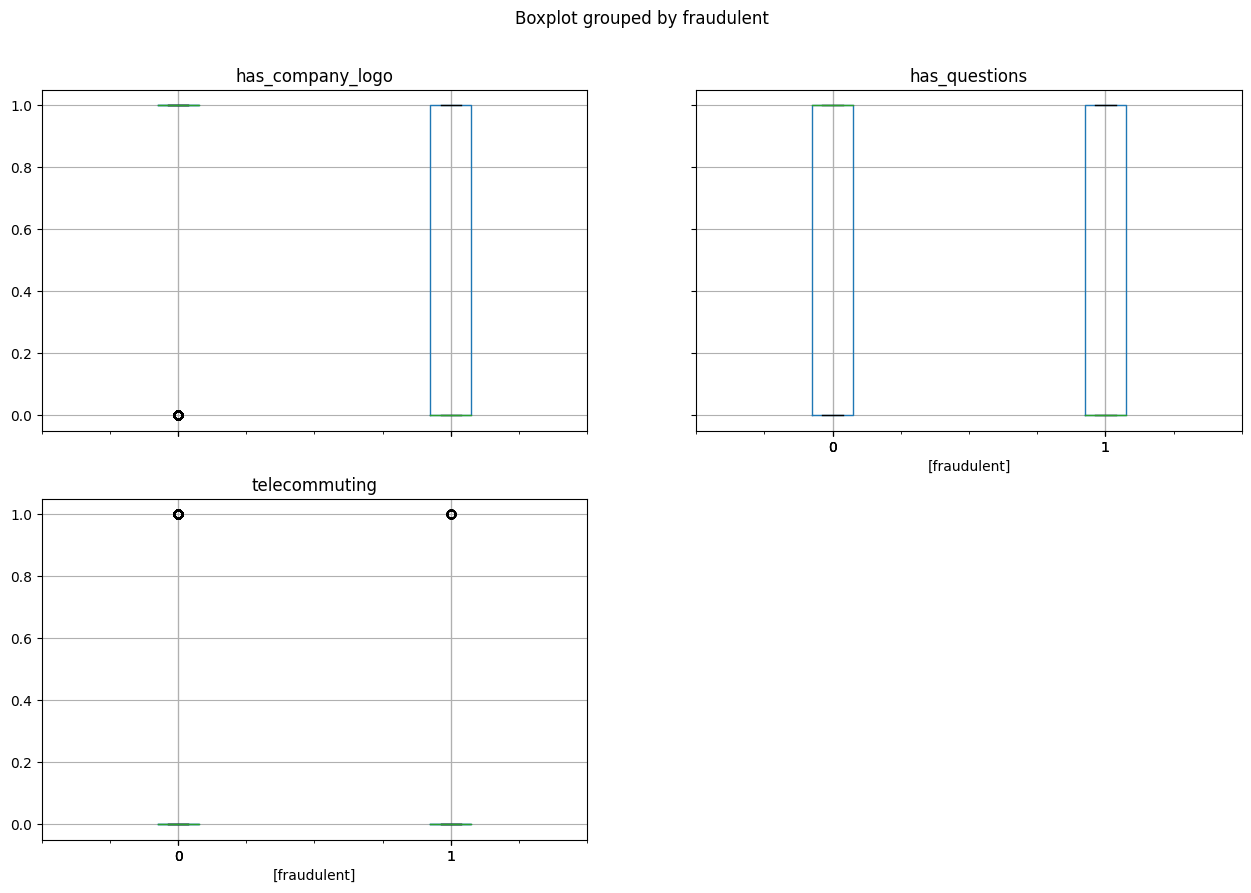

In [15]:
plt.figure()
dataset.drop("job_id", axis=1).boxplot(by="fraudulent", figsize=(15, 10))
plt.show()

In [16]:
#KNN Predicions
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
#Model Evaluation
#Building a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3355,   68],
       [ 147,    6]], dtype=int64)

In [18]:
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.99 %.


In [21]:
#Predict Output
x1=float(input("Enter telecommuting in integer form:"))
x2=float(input("Enter has_company_logo in integer form:"))
x3=float(input("Enter has_questions in integer form:"))
predicted_class= classifier.predict([[x1,x2,x3]])#x1,x2,x3,x4 are the different values entered by users for the features
#print(predicted)
if predicted_class==0:
    print("...The Job is: Legitimate...")
else:
    print("...The Job is Fraudulent...")

Enter telecommuting in integer form:1
Enter has_company_logo in integer form:1
Enter has_questions in integer form:1
[0]


*Conclusions
The KNN algorithm is very intuitive and easy to understand
Its versatile-Can be used for classification or regression. 
The training time is minimal, the model doesn’t actually learns or generalizes
The testing time can be very long, because the algorithm loops over the whole training dataset and calculates the distances (distance calculation can be a hard work, based on the type of distance metric and based on the type of the dataset)
For small K values the algorithm can be noise sensitive and easy to overfit
The data set should numeric or a distance metrics should exist to calculate distances between points
Doesn’t perform too well on unbalanced data
Sensitive to irrelevant features and the scale of the data.